In [20]:
#"Weekend Getaway Ranker" PROJECT
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("Top Indian Places to Visit.csv")   


print("Columns in dataset:\n", df.columns)

features = [
    'Google review rating',
    'Number of google review in lakhs',
    'time needed to visit in hrs'
]


df = df.dropna(subset=features)


scaler = MinMaxScaler()

df[['Rating_norm',
    'Popularity_norm',
    'Time_norm']] = scaler.fit_transform(df[features])
df['Final_Score'] = (
    0.45 * df['Rating_norm'] +
    0.35 * df['Popularity_norm'] +
    0.20 * (1 - df['Time_norm'])
)
top_places = df.sort_values(by='Final_Score', ascending=False)

display(
    top_places[['Name', 'City', 'Final_Score']]
    .head(10)
    .style
    .set_properties(**{'font-weight': 'bold'})
)




Columns in dataset:
 Index(['Unnamed: 0', 'Zone', 'State', 'City', 'Name', 'Type',
       'Establishment Year', 'time needed to visit in hrs',
       'Google review rating', 'Entrance Fee in INR',
       'Airport with 50km Radius', 'Weekly Off', 'Significance',
       'DSLR Allowed', 'Number of google review in lakhs',
       'Best Time to visit'],
      dtype='object')


,Name,City,Final_Score
315,Buddh International Circuit,Greater Noida,0.915275
17,Gateway of India,Mumbai,0.766071
0,India Gate,Delhi,0.734094
92,Golden Temple (Harmandir Sahib),Amritsar,0.708744
306,Kedarnath,Kedarnath,0.700623
296,Baba Baidyanath Temple,Deoghar,0.693678
111,Mysore Palace,Mysore,0.683204
32,Charminar,Hyderabad,0.682172
181,Taj Mahal,Agra,0.671364
305,Gurudwara Bangla Sahib,New Delhi,0.671014


C:\Users\soumy\AppData\Local\Temp\ipykernel_25276\955589432.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


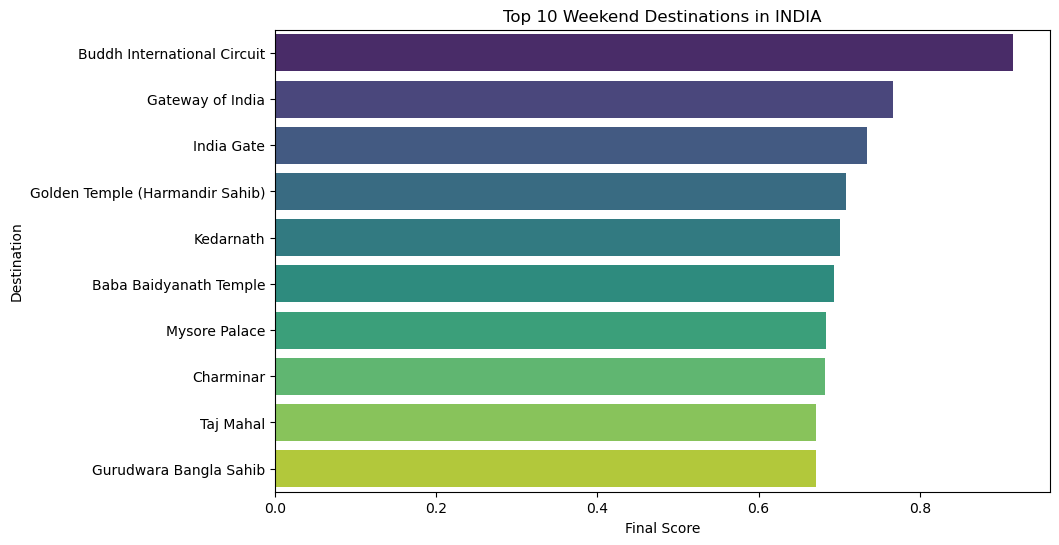

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = top_places.head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Final_Score',
    y='Name',
    data=top10,
    palette='viridis'
)

plt.title("Top 10 Weekend Destinations in INDIA")
plt.xlabel("Final Score")
plt.ylabel("Destination")
plt.show()
